# Prever nota de matemática do ENEM

**Importando as bibliotecas**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Carregando os datasets**

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

**Alguns dados sobre os datasets**

Primeiro: train.csv

In [5]:
print("--------------Columns------------")
print(train.columns)
print("----------Top-5- Record----------")
print(train.head(5))
print("-----------Information-----------")
print(train.info())
print("-----------Data Types-----------")
print(train.dtypes)
print("----------Missing value-----------")
print(train.isnull().sum())
print("----------Null value-----------")
print(train.isna().sum())
print("----------Shape of Data----------")
print(train.shape)

--------------Columns------------
Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)
----------Top-5- Record----------
   Unnamed: 0                              NU_INSCRICAO  NU_ANO  \
0           1  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad    2016   
1           2  2c3acac4b33ec2b195d77e7c04a2d75727fad723    2016   
2           3  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568    2016   
3           4  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe    2016   
4           5  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268    2016   

   CO_MUNICIPIO_RESIDENCIA NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  \
0                  4314902            Porto Alegre                43   
1                  2304707                  Gran

Agora test.csv

In [6]:
print("--------------Columns------------")
print(test.columns)
print("----------Top-5- Record----------")
print(test.head(5))
print("-----------Information-----------")
print(test.info())
print("-----------Data Types-----------")
print(test.dtypes)
print("----------Missing value-----------")
print(test.isnull().sum())
print("----------Null value-----------")
print(test.isna().sum())
print("----------Shape of Data----------")
print(test.shape)

--------------Columns------------
Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')
----------Top-5- Record----------
                               NU_INSCRICAO  CO_UF_RESIDENCIA  \
0  73ff9fcc02f0a99919906c942c2e1a1042cdcf98                41   
1 

**Analisando os dtypes**

In [7]:
train.dtypes

Unnamed: 0                  int64
NU_INSCRICAO               object
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
                            ...  
Q046                       object
Q047                       object
Q048                       object
Q049                       object
Q050                       object
Length: 167, dtype: object

In [8]:
test.dtypes

NU_INSCRICAO               object
CO_UF_RESIDENCIA            int64
SG_UF_RESIDENCIA           object
NU_IDADE                    int64
TP_SEXO                    object
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
TP_DEPENDENCIA_ADM_ESC    float64
IN_BAIXA_VISAO              int64
IN_CEGUEIRA                 int64
IN_SURDEZ                   int64
IN_DISLEXIA                 int64
IN_DISCALCULIA              int64
IN_SABATISTA                int64
IN_GESTANTE                 int64
IN_IDOSO                    int64
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
CO_PROVA_CN                object
CO_PROVA_CH                object
CO_PROVA_LC                object
CO_PROVA_MT                object
NU_NOTA_CN                float64
NU_NOTA_CH    

**Visualização gráfica dos dados**

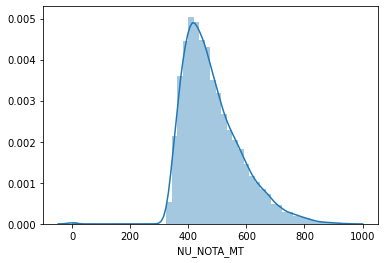

In [11]:
sns.distplot(train['NU_NOTA_MT'])

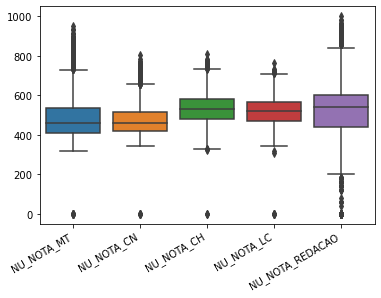

In [12]:
sns.boxplot(data=train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']])
plt.xticks(rotation=30, ha='right')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

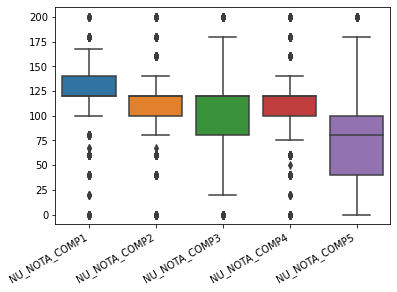

In [13]:
sns.boxplot(data=train[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']])
plt.xticks(rotation=30, ha='right')

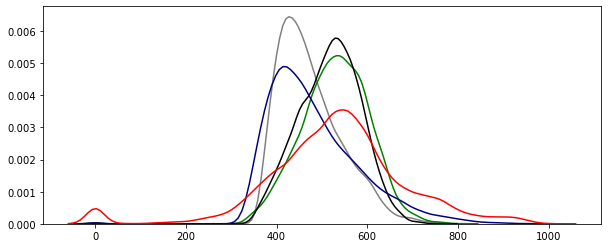

In [19]:
plt.figure(figsize=(10,4))
sns.distplot(train['NU_NOTA_CN'].dropna(), hist=False, color='gray')
sns.distplot(train['NU_NOTA_CH'].dropna(), hist=False, color='green')
sns.distplot(train['NU_NOTA_LC'].dropna(), hist=False, color='black')
sns.distplot(train['NU_NOTA_MT'].dropna(), hist=False, color='navy')
sns.distplot(train['NU_NOTA_REDACAO'].dropna(), hist=False, color='red')
plt.xlabel("")
plt.show()

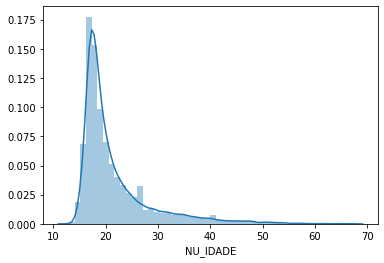

In [15]:
sns.distplot(train['NU_IDADE'])

In [20]:
train_copy = train.copy()

**Seleção de variáveis**

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
var = train_copy[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
var.fillna(-1, inplace=True)

In [26]:
y = var['NU_NOTA_MT']
X = var.drop('NU_NOTA_MT', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

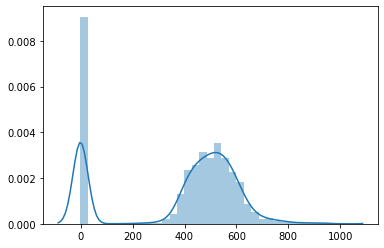

In [27]:
sns.distplot(np.array(X.dropna()).reshape(-1,1))

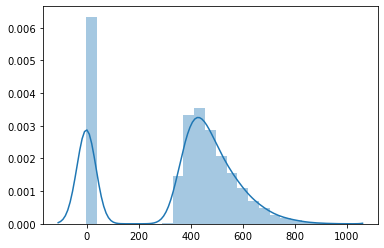

In [30]:
sns.distplot(np.array(y.dropna()).reshape(-1,1))

In [31]:
X_test = test[X.columns]
X_test.fillna(-1, inplace=True)

**Treinando o modelo**

In [41]:
random_forest = RandomForestRegressor(criterion='mse', max_depth=8, n_jobs=-1, random_state=42)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_val)

mae = metrics.mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
mse = mean_squared_error(y_val, y_pred)

print(mae,rmse,mse)

42.695653938110304 63.372019217177694 4016.0128196623386


In [34]:
y_pred = random_forest.predict(X_test)

In [35]:
answer = pd.DataFrame({'NU_INSCRICAO':test.NU_INSCRICAO,
                        'TP_PRESENCA_CN':test.TP_PRESENCA_CN,
                        'NU_NOTA_MT':y_pred})
answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,430.986341
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,446.782447
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,594.424693
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-1.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,536.476658


In [36]:
answer.drop('TP_PRESENCA_CN', axis=1, inplace=True)
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,430.986341
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,446.782447
2,b38a03232f43b11c9d0788abaf060f7366053b6d,594.424693
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-1.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,536.476658


In [37]:
answer.to_csv('answer.csv', index=False)